# Load Cleaned Datasets

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the cleaned data
cleaned_data_path = os.path.abspath("../data/cleaned")

# List all cleaned files
import glob
cleaned_files = glob.glob(os.path.join(cleaned_data_path, "*.csv"))
print(f"Cleaned files detected: {cleaned_files}")

# Load all files into a single DataFrame
dataframes = [pd.read_csv(file) for file in cleaned_files]
combined_data = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined data
print("Initial combined data:")
print(combined_data.head())

Cleaned files detected: ['C:\\Users\\sunsh\\OneDrive\\Desktop\\reporting\\data\\cleaned\\pr202401_cleaned.csv', 'C:\\Users\\sunsh\\OneDrive\\Desktop\\reporting\\data\\cleaned\\pr202402_cleaned.csv', 'C:\\Users\\sunsh\\OneDrive\\Desktop\\reporting\\data\\cleaned\\pr202403_cleaned.csv', 'C:\\Users\\sunsh\\OneDrive\\Desktop\\reporting\\data\\cleaned\\pr202404_cleaned.csv', 'C:\\Users\\sunsh\\OneDrive\\Desktop\\reporting\\data\\cleaned\\pr202405_cleaned.csv', 'C:\\Users\\sunsh\\OneDrive\\Desktop\\reporting\\data\\cleaned\\pr202406_cleaned.csv', 'C:\\Users\\sunsh\\OneDrive\\Desktop\\reporting\\data\\cleaned\\pr202407_cleaned.csv', 'C:\\Users\\sunsh\\OneDrive\\Desktop\\reporting\\data\\cleaned\\pr202408_cleaned.csv', 'C:\\Users\\sunsh\\OneDrive\\Desktop\\reporting\\data\\cleaned\\pr202409_cleaned.csv']
Initial combined data:
                 type_of_construction    jan_2024    dec_2023    nov_2023  \
0              Type of Construction\n  Jan\n2024p  Dec\n2023r  Nov\n2023r   
1              

# Transform Columns

In [9]:
# Drop empty or irrelevant columns
combined_data.dropna(how="all", axis=1, inplace=True)

# Rename columns (adjust based on the dataset)
combined_data.columns = [
    "type_of_construction",
    "jan_2024",
    "dec_2023",
    "nov_2023",
    "oct_2023",
    "sep_2023",
    "jan_2023",
    "percent_change_dec",
    "percent_change_jan"
]

# Drop rows that are irrelevant or empty
combined_data = combined_data[combined_data["type_of_construction"].notna()]

# Convert numeric columns to appropriate types
numeric_columns = [
    "jan_2024",
    "dec_2023",
    "nov_2023",
    "oct_2023",
    "sep_2023",
    "jan_2023",
    "percent_change_dec",
    "percent_change_jan"
]

for col in numeric_columns:
    combined_data[col] = pd.to_numeric(combined_data[col], errors="coerce")  # Replace invalid values with NaN

# Fill missing values in numeric columns with 0
combined_data[numeric_columns] = combined_data[numeric_columns].fillna(0)

# Verify the Data

In [10]:
print("Data types and summary statistics after cleaning:")
print(combined_data.info())
print(combined_data.describe())

# Check for missing values
print("Missing values:")
print(combined_data.isnull().sum())

Data types and summary statistics after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type_of_construction  540 non-null    object 
 1   jan_2024              540 non-null    float64
 2   dec_2023              540 non-null    float64
 3   nov_2023              540 non-null    float64
 4   oct_2023              540 non-null    float64
 5   sep_2023              540 non-null    float64
 6   jan_2023              540 non-null    float64
 7   percent_change_dec    540 non-null    float64
 8   percent_change_jan    540 non-null    float64
dtypes: float64(8), object(1)
memory usage: 38.1+ KB
None
           jan_2024      dec_2023      nov_2023      oct_2023      sep_2023  \
count  5.400000e+02  5.400000e+02  5.400000e+02  5.400000e+02  5.400000e+02   
mean   1.908750e+05  1.911999e+05  1.911946e+05  1.905665e+05  1.8961

# Exploratory Analysis

# Plot total spending for January 2024 by type of construction

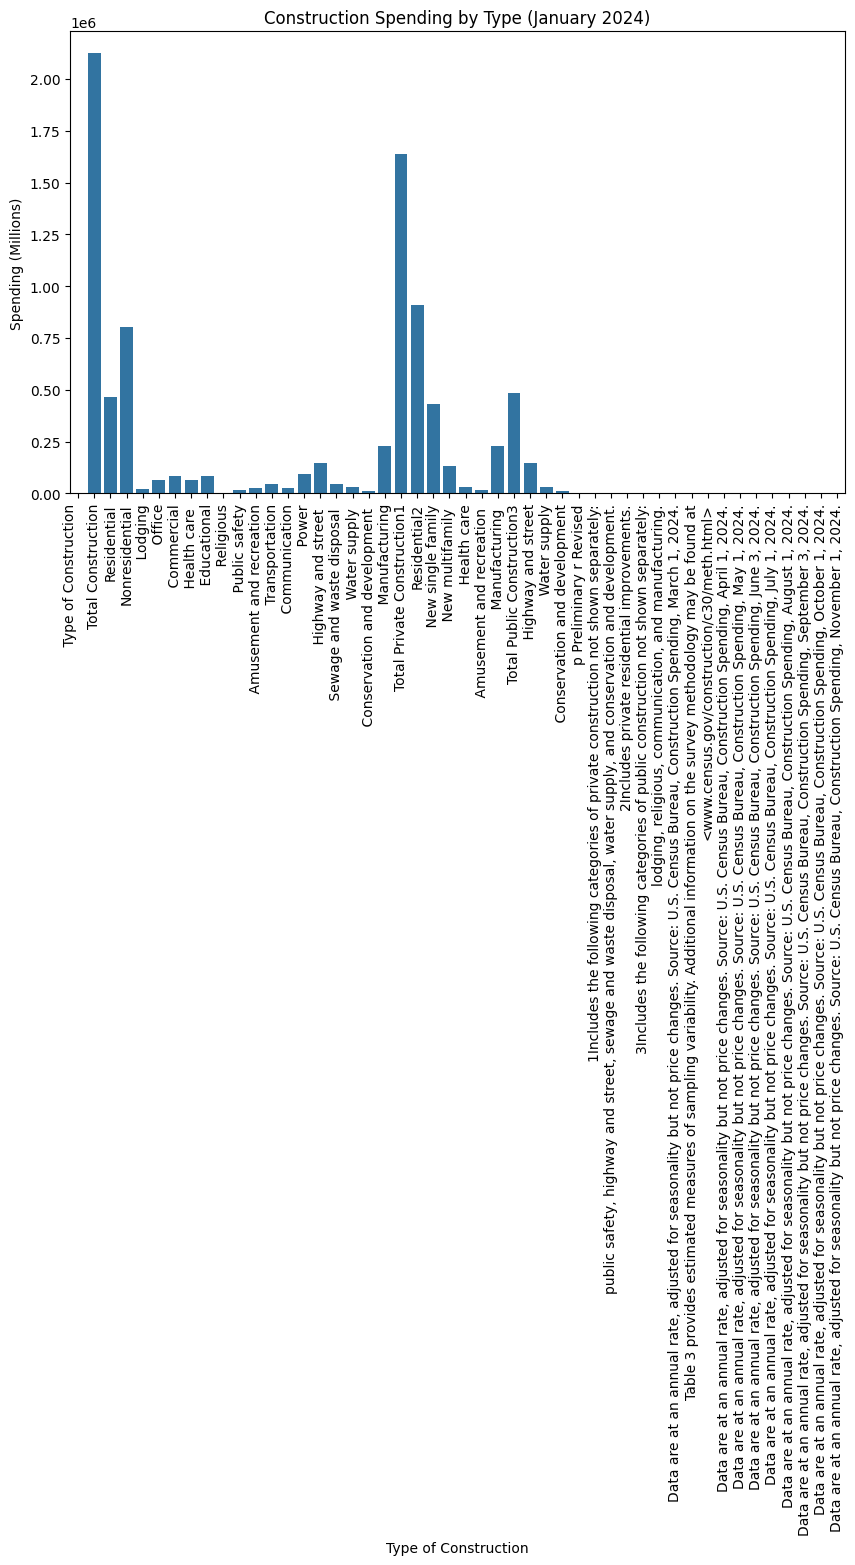

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=combined_data,
    x="type_of_construction",
    y="jan_2024",
    errorbar=None
)
plt.xticks(rotation=90)
plt.title("Construction Spending by Type (January 2024)")
plt.xlabel("Type of Construction")
plt.ylabel("Spending (Millions)")
plt.show()

# Plot spending trends over time

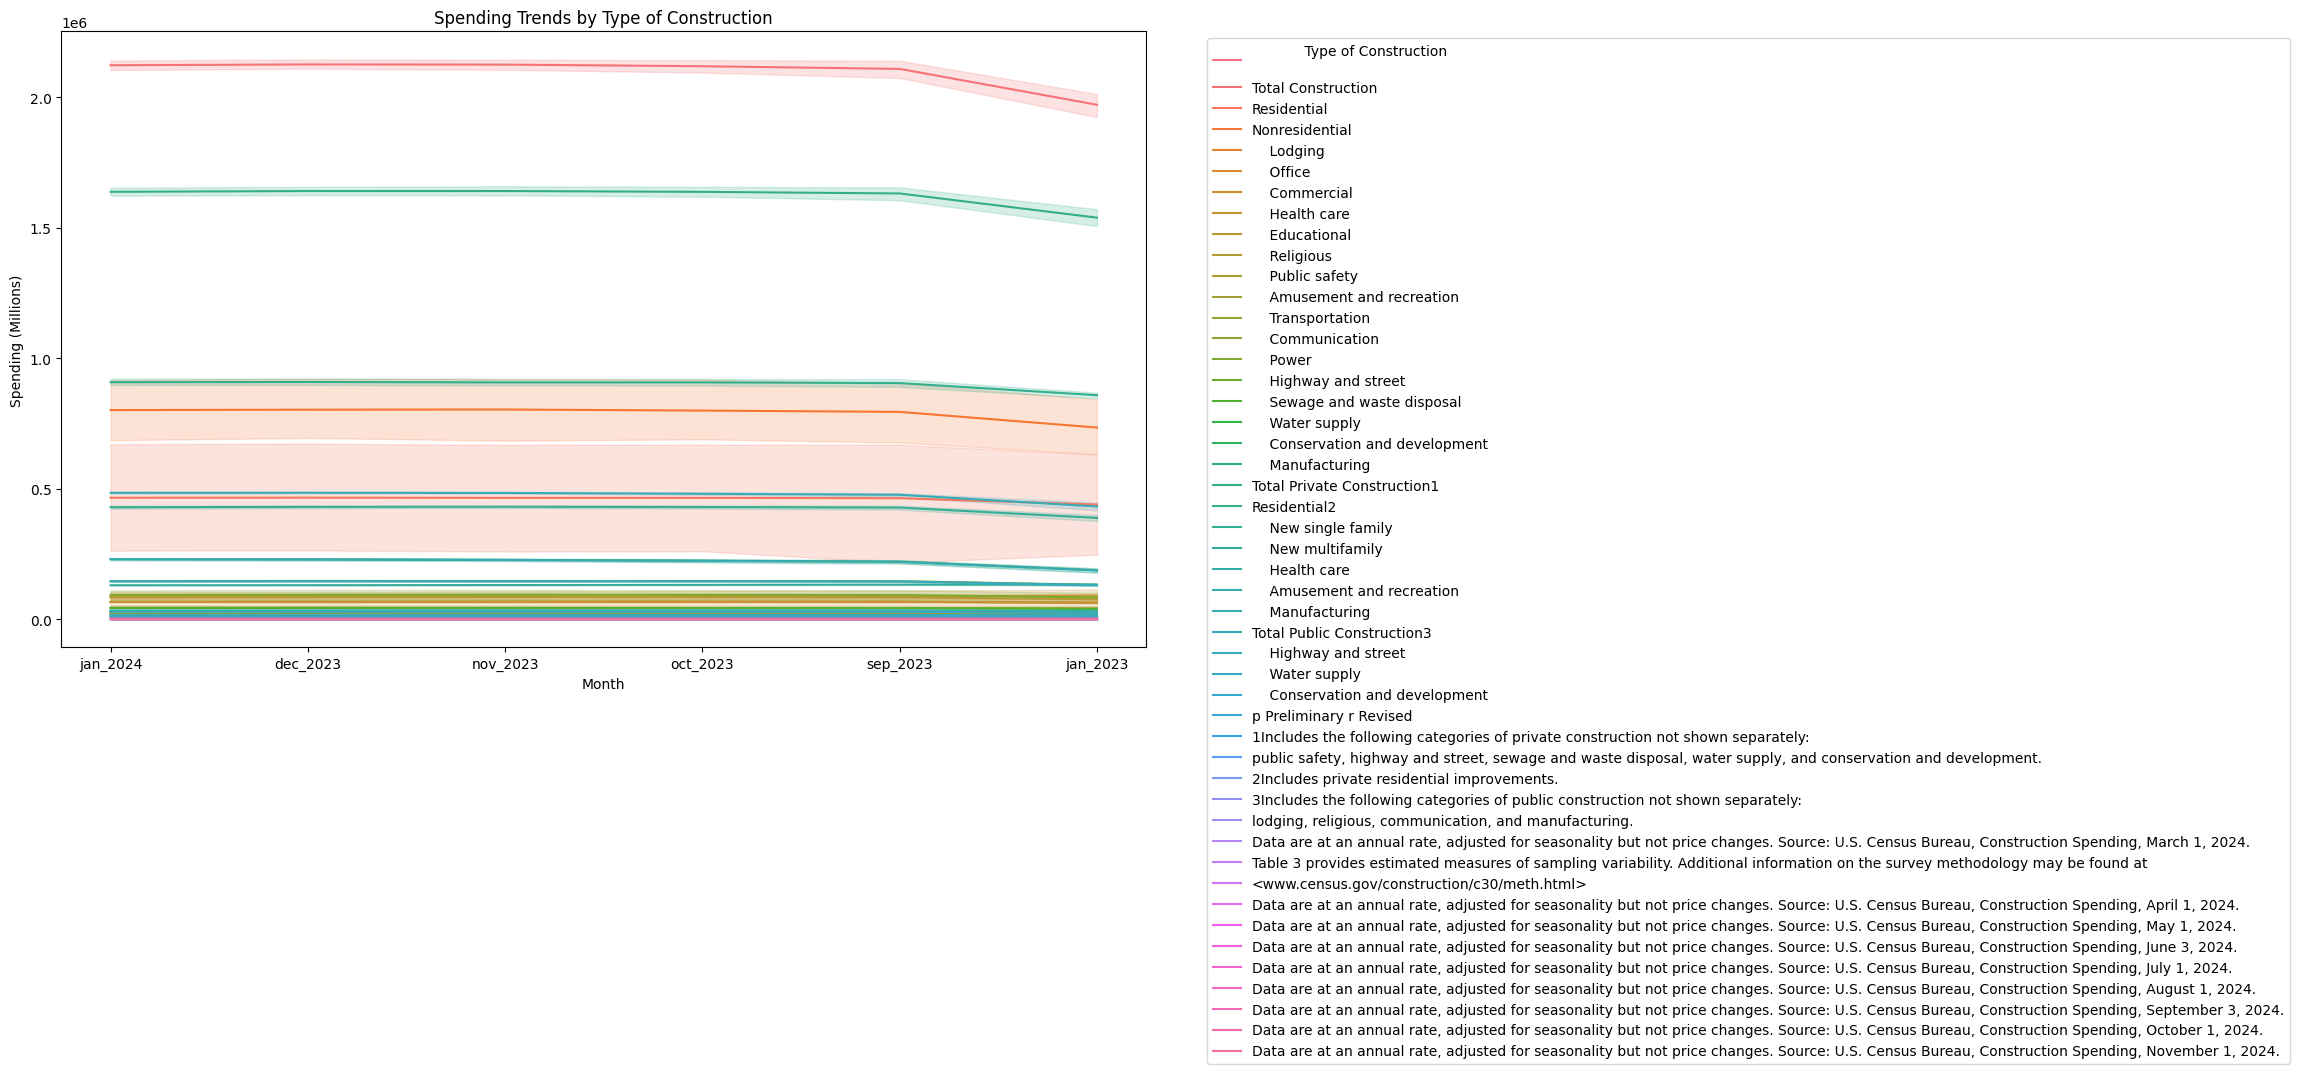

In [14]:
combined_data_melted = combined_data.melt(
    id_vars=["type_of_construction"],
    value_vars=["jan_2024", "dec_2023", "nov_2023", "oct_2023", "sep_2023", "jan_2023"],
    var_name="month",
    value_name="spending"
)

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=combined_data_melted,
    x="month",
    y="spending",
    hue="type_of_construction"
)
plt.title("Spending Trends by Type of Construction")
plt.xlabel("Month")
plt.ylabel("Spending (Millions)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Correlation heatmap for numeric columns

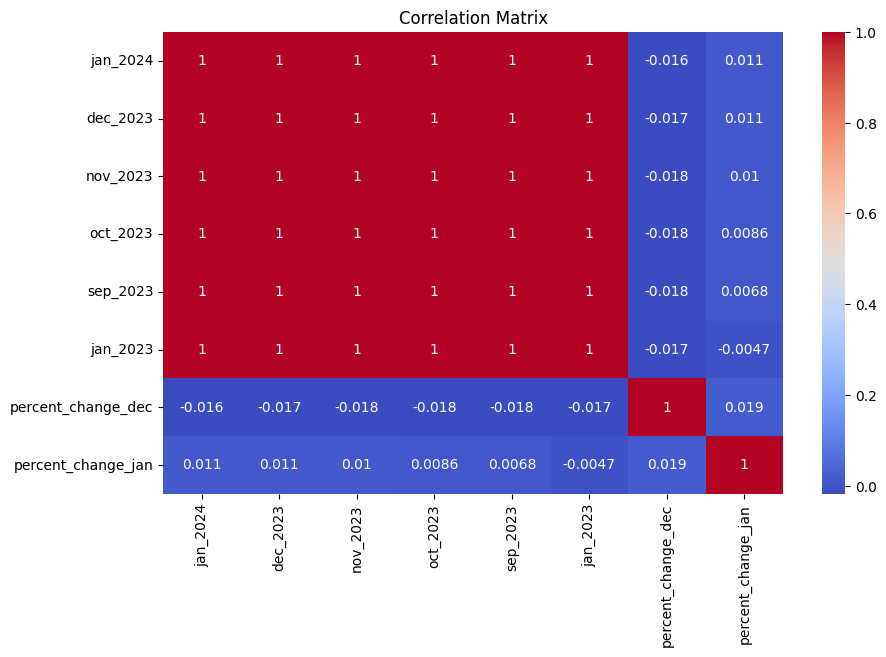

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    combined_data[numeric_columns].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix")
plt.show()